# SEIR model class experiments

Utilities for train, forecasting and plotting are now provided in nb_utils.
Documentation for the helper functions are available as docstrings.

Set the appropriate training parameters and forecast parameters in the 
corresponding cells.

train_eval   
> Train and evaluate models (currently we only support SEIR family). 
  Default configuration parameters for train and test files are 
  provided as train_config.json and test_config.json respectively.
  Search paramters, loss functions etc, are specified in the config
  files.

forecast, plot
> Generate forecasts using a trained model and plotting utilities.

In [1]:
import json
import pandas as pd

from datetime import datetime, timedelta

from nb_utils import train_eval
from nb_utils import forecast
from nb_utils import plot
from nb_utils import plot_m1, plot_m2, plot_m3

## Load default configurations

In [2]:
with open('train_config.json') as f_train, \
    open('test_config.json') as f_test, \
    open('forecast_config.json') as f_forecast:
    default_train_config = json.load(f_train)
    default_test_config = json.load(f_test)
    default_forecast_config = json.load(f_forecast)

## Set the model class

In [3]:
model_class = 'SEIHRD'
default_train_config['model_class'] = model_class
default_test_config['model_class'] = model_class
default_forecast_config['model_class'] = model_class

## Optional: Modify training loss function

In [4]:
variable_and_weights = [('confirmed', 1.0) , ('recovered', 1.0), ('deceased', 1.0), ('hospitalized', 1.0)]
weights = {'metric_name' : 'mape', 'variable_weights' : []}
for (variable, weight) in variable_and_weights:
    weights['variable_weights'].append({
        "variable" : variable,
        "weight" : weight
    })
default_train_config['training_loss_function'].update(weights)

## Training parameters

In [5]:
region = 'jaipur'
region_type = 'district'

In [6]:
#Current day : Last day without the flattening of counts
current_day = datetime.now().date() - timedelta(4)

# Train1 : 1 week interval starting 2 weeks prior to current day
train1_start_date = current_day - timedelta(14)
train1_end_date = current_day - timedelta(7)

train1_start_date = train1_start_date.strftime("%-m/%-d/%y")
train1_end_date = train1_end_date.strftime("%-m/%-d/%y")

# Train2 : 1 week interval starting 1 week prior to current day
train2_start_date = current_day - timedelta(7)
train2_end_date = current_day
train2_run_day = train2_start_date - timedelta(1)

train2_start_date = train2_start_date.strftime("%-m/%-d/%y")
train2_end_date = train2_end_date.strftime("%-m/%-d/%y")
train2_run_day = train2_run_day.strftime("%-m/%-d/%y")

# Test: 1 week interval prior to current day
test_start_date = current_day - timedelta(7)
test_end_date = current_day
test_run_day = test_start_date - timedelta(1)

test_start_date = test_start_date.strftime("%-m/%-d/%y")
test_end_date = test_end_date.strftime("%-m/%-d/%y")
test_run_day = test_run_day.strftime("%-m/%-d/%y")

## train_eval on the region of interest

In [7]:
params, metrics, train1_params, train2_params = train_eval(region, region_type, 
                                                           train1_start_date, train1_end_date, 
                                                           train2_start_date, train2_end_date, train2_run_day,
                                                           test_start_date, test_end_date,
                                                           default_train_config, default_test_config,
                                                           max_evals = 10,
                                                           mlflow_log = False,
                                                           name_prefix = 'mumbai_sample');

t = 8.90                                              
t = 8.90                                              
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                        
t = 8.90                                                                       
t = 8.90                                                                       
t = 8.90                                                                       
t = 8.90                                                                       
100%|██████████| 10/10 [00:00<00:00, 12.25trial/s, best loss: 795.3588487063622]
Best fit: {'EbyCRatio': 8.979155066611987, 'F_fatalities': 0.026773443034186276, 'F_hospitalization': 0.06758631801338812, 'IbyCRatio': 0.6423070366045787, 'infectio

## Inspect model parameters

In [8]:
train1_params

{'region': 'jaipur',
 'region_type': 'district',
 'model_type': 'SEIHRD',
 'model_parameters': {'incubation_period': 5,
  'F_icu': 0.05,
  'EbyCRatio': 8.979155066611987,
  'F_fatalities': 0.026773443034186276,
  'F_hospitalization': 0.06758631801338812,
  'IbyCRatio': 0.6423070366045787,
  'infectious_period': 9.832648176697946,
  'r0': 4.857872877768825,
  'LatentEbyCRatio': {'5/5/20': 8.979155066611987,
   '5/13/20': 5.6521922772870425},
  'LatentIbyCRatio': {'5/5/20': 0.6423070366045787,
   '5/13/20': 0.3076738565595323},
  'MAPE': 795.3588487063622}}

In [9]:
train2_params

{'region': 'jaipur',
 'region_type': 'district',
 'model_type': 'SEIHRD',
 'model_parameters': {'incubation_period': 5,
  'F_icu': 0.05,
  'EbyCRatio': 1.2243721996465995,
  'F_fatalities': 0.07523383178776535,
  'F_hospitalization': 0.11362356942194726,
  'IbyCRatio': 0.6185238099948498,
  'infectious_period': 2.4751841234201732,
  'r0': 5.282235856334567,
  'LatentEbyCRatio': {'5/12/20': 1.2243721996465995,
   '5/20/20': 1.2295398638313708},
  'LatentIbyCRatio': {'5/12/20': 0.6185238099948498,
   '5/20/20': 0.1342177640943761},
  'MAPE': 1047.7349520018886}}

In [10]:
metrics

{'Train1RMLSE': 0,
 'Train1MAPE': 1590.7176974127244,
 'Train1All': [{'metric_name': <MetricName.mape: 'mape'>,
   'variable_weights': [{'variable': <ForecastVariable.confirmed: 'confirmed'>,
     'weight': 1.0},
    {'variable': <ForecastVariable.recovered: 'recovered'>, 'weight': 1.0},
    {'variable': <ForecastVariable.deceased: 'deceased'>, 'weight': 1.0},
    {'variable': <ForecastVariable.hospitalized: 'hospitalized'>,
     'weight': 1.0}],
   'value': 795.3588487063622},
  {'metric_name': <MetricName.mape: 'mape'>,
   'variable_weights': [{'variable': <ForecastVariable.confirmed: 'confirmed'>,
     'weight': 1.0}],
   'value': 230.67469713092197},
  {'metric_name': <MetricName.mape: 'mape'>,
   'variable_weights': [{'variable': <ForecastVariable.hospitalized: 'hospitalized'>,
     'weight': 1.0}],
   'value': 52.5053513232234},
  {'metric_name': <MetricName.mape: 'mape'>,
   'variable_weights': [{'variable': <ForecastVariable.recovered: 'recovered'>,
     'weight': 1.0}],
   'va

## Generate Plots

t = 8.90


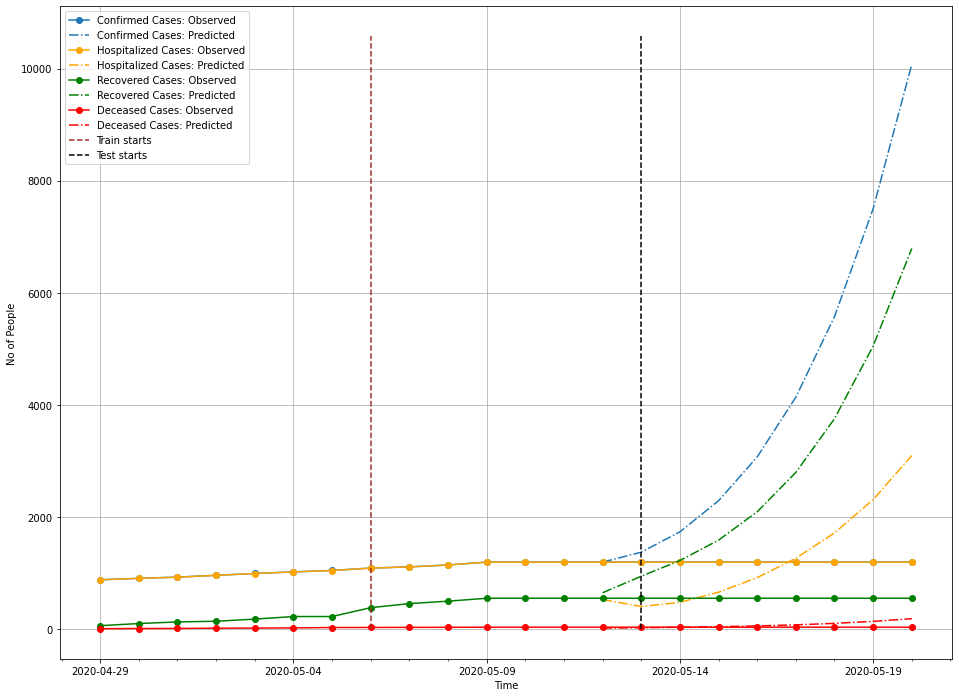

In [11]:
plot_m1(train1_params, train1_start_date, train1_end_date, 
        test_run_day, test_start_date, test_end_date, 
        rolling_average = False, uncertainty = False, 
        plot_config = 'plot_config.json', plot_name = 'jaipur_m1.png')

t = 8.90


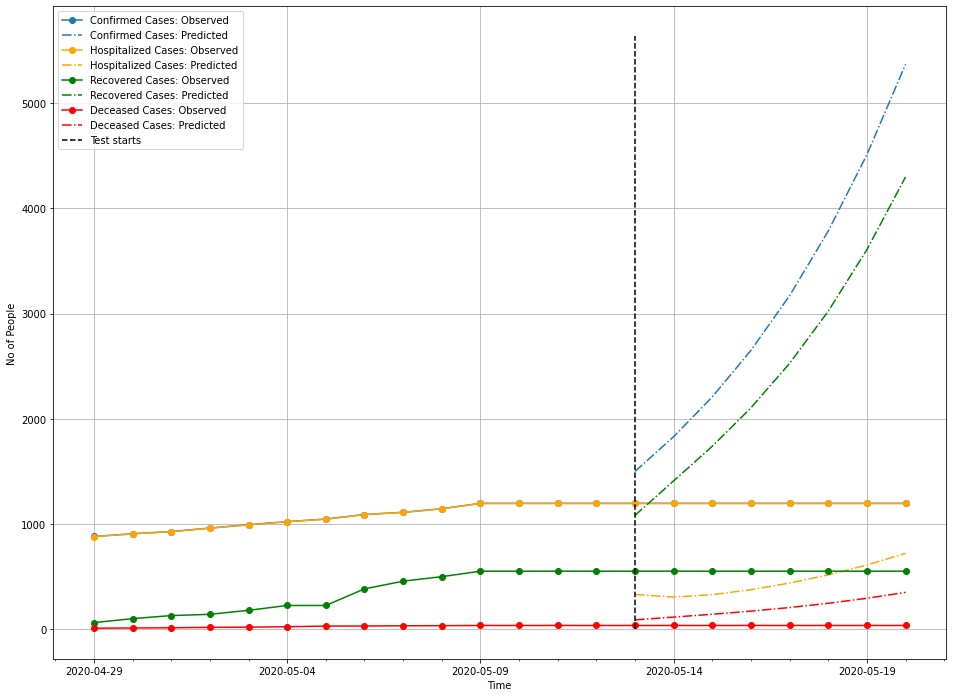

In [12]:
plot_m2(train2_params, train1_start_date, train1_end_date, 
        test_run_day, test_start_date, test_end_date, plot_name = 'jaipur_m2.png')

t = 31.90


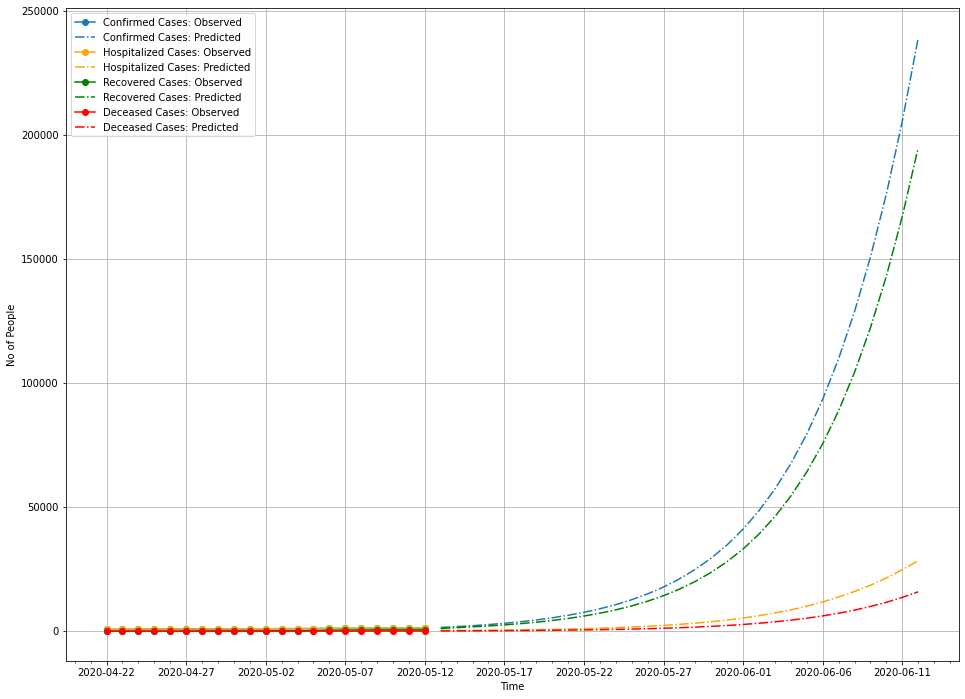

In [13]:
forecast_start_date = train2_start_date
forecast_length = 30 # Forecast for 30 days
plot_m3(train2_params, train1_start_date, 
        forecast_start_date, forecast_length, plot_name = 'jaipur_m3.png')